# IRIS-Flower-classification

Этот проект представляет собой применение машинного обучения с программированием на Python на примере классификации цветов IRIS с использованием машинного обучения с инструментами scikit.
Здесь используются алгоритмы, которые представляют собой некоторые типы машинного обучения с учителем и без учителя.

[Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном. Этот набор данных стал классическим и часто используется в литературе для иллюстрации работы различных статистических алгоритмов.

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

В качестве задания вам предлагается повторить данные действия по классификации для наборов данных (можно выбрать, что больше понравится, но лучше сделать для всех)
- [User Knowledge Modeling Data Set](http://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)
- [Blood Transfusion Service Center Data Set](http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)
- [Somerville Happiness Survey Data Set](http://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)
- [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)



In [24]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

# разделение выборки
from sklearn.model_selection import train_test_split
#метрики
from sklearn import metrics
#деревья решений
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [25]:
pip install ucimlrepo

In [26]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [27]:
# читаем данные
url = 'https://archive.ics.uci.edu/static/public/186/data.csv'
data = pd.read_csv(url)
data.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [28]:
# Разделим выборку на обучающую и тестовую
train, test = train_test_split(data, test_size = 0.4, stratify = data['color'], random_state = 42)

In [29]:
# Выделим признаки и результат
X_train = train[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar']]
y_train = train.color
X_test = test[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar']]
y_test = test.color

fn = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar']
cn = data['color'].unique()

# Деревья решений

Каждый раз, принимая некоторое решение, например, стоит ли идти играть в теннис (_почему бы и нет, окей?_), мы проверяем, осознанно и неосознанно, множество факторов, которые можно представить в виде дерева:

<img src="https://raw.githubusercontent.com/yakushinav/omo/main/img/play_tennis.png" width="50%">

Каждое такое условие - элементарный вопрос, подразумевающий ответ _"да"_ или _"нет"_. В то время очевидно, что такая структура может легко масштабироваться, рости, захватывая даже сложные сценарии.

Именно поэтому неудивительно, что __деревья принятия решений__ применяются в областях, где необходимость в построении такого рода проверок должна быть автоматизирована, например, в банковском кредитном скоринге (проверке, можно ли клиенту предоставить кредит):

1. Какой возраст у клиента? Если меньше 18, то отказываем в кредите, иначе продолжаем.
2. Какая зарплата у клиента? Если меньше 50 тысяч рублей, то переходим к шагу 3, иначе к шагу 4.
3. Какой стаж у клиента? Если меньше 10 лет, то не выдаем кредит, иначе выдаем.
4. Есть ли у клиента другие кредиты? Если есть, то отказываем, иначе выдаем.

__PROS:__

* Крайне хорошо интерпретируется результат и решение.
* Достигают нулевой ошибки на любой выборке при достаточной глубине.

__CONS__:

* Трудны для оптимизации из-за свой дискретной структуры — дерево нельзя продифференцировать по параметрам и найти с помощью градиентного спуска хотя бы локальный оптимум.
* Достаточно трудны в настройке, и все методы их построения на сегодня являются жадными и эвристичными.

## Алгоритм построения

Дерево формируется таким образом, что:

* каждой внутренней вершине v приписана функция $ \beta_v : X \rightarrow \{ 0,1 \} $
* каждой листовой вершине v приписана метка класса $ c_v \in Y $.

С точки зрения некорого критерия $ Q(X, j, s) $ находим такое разбиение, что $ R_1(j,s) = \{ x \space | \space x_j \le s \} $ и $ R_2(j,s) = \{ x \space | \space  x_j > s \} $. Очевидно, что критерий разбиения $ [ x_j < s ] $ и является функцией $ \beta_v $, о которой я говорил выше.

После чего циклически повторяем данную процедуру разбиения для объектов из левого ($R_1$) и правого ($R_2$) поддеревьев до некорого порога останова. Им может являться:

1. Ограничение максимальной глубины дерева.
2. Ограничение минимального числа объектов в листе.
3. Ограничение максимального количества листьев в дереве.
4. Останов в случае, если все объекты в листе относятся к одному классу.
5. Требование, что функционал качества при дроблении улучшался как минимум на $s$ процентов.

Если при остановке в лист попадают объекты разных классов, то, конечно, предпочтение отдается большинству.

Остается вопрос, что же за $ Q(X, j, s) $?

## Критерий информативности Q

Рассмотрим пример.

Пусть в выборке 30 студентов. Известно, что ровно половина из них играют в крикет, но не известно, кто. Всего 2 признака: класс, в котором он учится, и  пол студента.

### Индекс Джини (Gini)

Максимизацию критерия Джини можно условно интерпретировать как максимизацию числа пар объектов одного класса, оказавшихся в одном поддереве.

<img src="https://raw.githubusercontent.com/yakushinav/omo/main/img/dt.png">

##### Разделение по полу (слева)

1. Коэффициент Джини для узла __Female__ = $(0.2)*(0.2)+(0.8)*(0.8)=0.68$
2. Коэффициент Джини для узла __Male__ = $(0.65)*(0.65)+(0.35)*(0.35)=0.55$
3. Взвешенный коэффициент Джини для разделения по полу = $(10/30)*0.68+(20/30)*0.55 $ = __0.59__

##### Разделение по классу (справа)

1. Коэффициент Джини для узла __Class IX__ = $(0.43)*(0.43)+(0.57)*(0.57)=0.51$
2. Коэффициент Джини для узла __Class X__ = $(0.56)*(0.56)+(0.44)*(0.44)=0.51$
3. Взвешенный коэффициент Джини для разделения по классу = $(14/30)*0.51+(16/30)*0.51 $ = __0.51__

In [30]:
# Деревья решений
# Параметр random_state задает начальную инициализацию генератора псевдслучайных чисел, чтобы данные были одинаковые при каждом запуске

#Выбираем классификатор
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
#Проводим обучение
mod_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [31]:
#Выполняем предсказание
y_pred=mod_dt.predict(X_test)

print('accuracy (точность) классификатора Деревья решений',metrics.accuracy_score(y_pred,y_test))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора Деревья решений 0.911119661408234
матрица ошибок
[[ 490  150]
 [  81 1878]]


In [32]:
# Использование построенной модели для предсказания класса
new_wine=[7.4, 0.70, 0.00,	1.9]
y_new_wine=mod_dt.predict([new_wine])

print(y_new_wine)

['red']


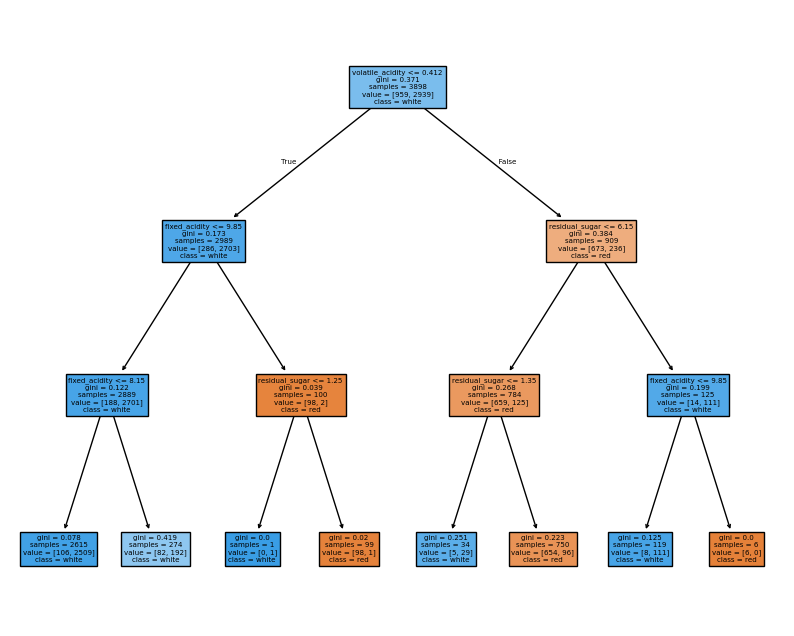

In [33]:
# Визуализация деревьев решений
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);